In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import Image 
import requests

from opera_tools import plot_dataframe, plot_dataframe_lines
%matplotlib inline

## Electronic detector data

In [2]:
event_url = "http://opendata.cern.ch/record/10101"
event_id = "9190097972" 

In [3]:
import os
def get_event_data(url, event_id, directory='data'):
    file_names = [
        f"{event_id}_EventInfo.csv",
        f"{event_id}_FilteredDTHitsXZ.csv",
        f"{event_id}_FilteredRPCHitsXZ.csv",
        f"{event_id}_FilteredRPCHitsYZ.csv",
        f"{event_id}_FilteredTTHitsYZ.csv",
        f"{event_id}_Vertices.csv",
        f"{event_id}_Tracks.csv",
        f"{event_id}_Lines.csv",
    ]
    if not os.path.exists(directory):
        os.mkdir(directory)
    for f in file_names:
        csv_url = f"{url}/files/{f}"
        req = requests.get(csv_url)
        url_content = req.content
        data_file = f'{directory}/{f}'
        csv_file = open(data_file, 'wb')
        csv_file.write(url_content)
        csv_file.close()
        print(data_file)
        

In [4]:
get_event_data(event_url, event_id)

data/9190097972_EventInfo.csv
data/9190097972_FilteredDTHitsXZ.csv
data/9190097972_FilteredRPCHitsXZ.csv
data/9190097972_FilteredRPCHitsYZ.csv
data/9190097972_FilteredTTHitsYZ.csv
data/9190097972_Vertices.csv
data/9190097972_Tracks.csv
data/9190097972_Lines.csv


In [5]:
EventInfo = pd.read_csv('data/9190097972_EventInfo.csv', index_col=None)
EventInfo

,evID,timestamp,enHad,enVis,enNeu,muMom
0,9190097972,1247167282000,16.5,439.7,16.5,0


Detector consisits of:
1. scintillator strips target tracker (TT), 
2. drift tubes (DT),
3. resistive plate chambers (RPC). 

*DT only have the XZ projection, while for RPC and and TT have both XZ and YZ projections.*

### Filtered data with removed isolated hits

In [6]:
FilteredDTHitsXZ = pd.read_csv('data/9190097972_FilteredDTHitsXZ.csv', index_col=None)
FilteredDTHitsXZ

,posX,posZ,driftDist
0,297.12,-359.62,1.37
1,299.22,-355.98,0.61
2,302.32,-351.92,1.44
3,300.22,-348.28,1.75
4,319.47,-285.81,1.14
5,322.57,-281.75,0.88
6,428.35,-174.79,1.82
7,427.25,-170.73,1.82
8,307.55,-167.12,0.01
9,393.85,-84.60,0.01


In [7]:
FilteredRPCHitsXZ = pd.read_csv('data/9190097972_FilteredRPCHitsXZ.csv', index_col=None)
FilteredRPCHitsXZ

,posX,posZ,clLength
0,324.3,-261.48,7.8


In [8]:
FilteredRPCHitsYZ = pd.read_csv('data/9190097972_FilteredRPCHitsYZ.csv', index_col=None)
FilteredRPCHitsYZ

,posY,posZ,clLength
0,-162.2,-261.48,2.6


In [9]:
FilteredTTHitsXZ = pd.read_csv('data/9190097972_FilteredTTHitsXZ.csv', index_col=None)

print(len(FilteredTTHitsXZ))
FilteredTTHitsXZ.head()

51


,posX,posZ,amplRec
0,271.14,-477.78,2.99
1,279.06,-477.78,0.75
2,271.25,-464.38,10.86
3,260.69,-464.38,43.13
4,265.97,-464.38,7.84


In [10]:
FilteredTTHitsYZ = pd.read_csv('data/9190097972_FilteredTTHitsYZ.csv', index_col=None)

print(len(FilteredTTHitsYZ))
FilteredTTHitsYZ.head()

46


,posY,posZ,amplRec
0,-116.30,-465.84,2.54
1,-137.42,-465.84,8.45
2,-126.86,-465.84,32.12
3,-124.22,-465.84,18.71
4,-105.74,-465.84,11.32


## Emulsion data

In [11]:
Vertices = pd.read_csv('data/9190097972_Vertices.csv', index_col=None)
Vertices

,posX,posY,posZ,globPosX,globPosY,globPosZ,primary
0,45200.1,10464.5,27810.0,261.401,-127.696,-460.111,1
1,45234.1,10580.2,28677.6,261.404,-127.684,-460.024,0


In [12]:
Tracks = pd.read_csv('data/9190097972_Tracks.csv', index_col=None)
print(len(Tracks))
Tracks.head()

22


,trType,posX,posY,posZ,slopeXZ,slopeYZ
0,2,45181.5,10519.3,28414.0,-0.0326,0.0917
1,2,45141.2,10636.8,29704.0,-0.0316,0.0897
2,2,45101.7,10759.0,31004.0,-0.0292,0.0884
3,2,45019.8,10994.5,33585.0,-0.0260,0.0776
4,2,44977.3,11109.9,34875.0,-0.0312,0.0862


In [13]:
Tracks.rename(index=str, columns={"posX": "SX", "posY": "SY", "posZ": "SZ", "slopeXZ": "TX", "slopeYZ": "TY" },
              inplace=True)

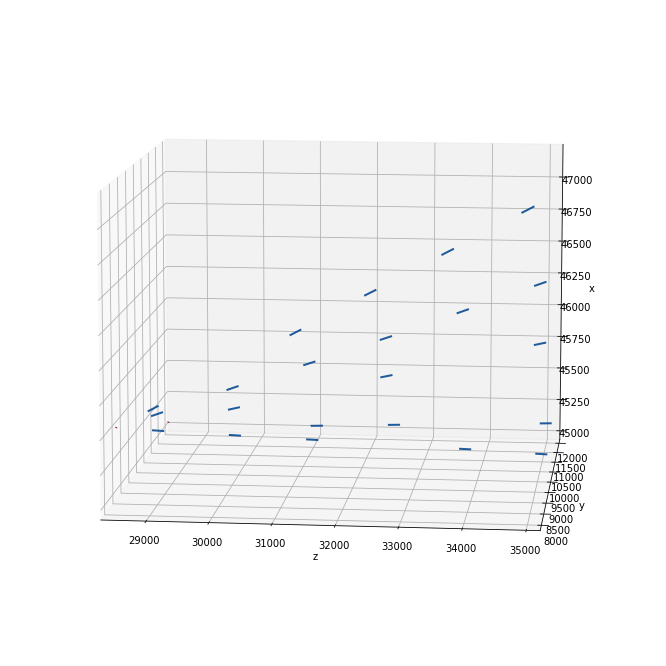

In [14]:
plot_dataframe(Tracks, Vertices)

*Red points on the graph correspond to the vertices*


----------------

In [15]:
Lines = pd.read_csv('data/9190097972_Lines.csv', index_col=None)
print(len(Lines))
Lines.head()

23


,trType,posX1,posY1,posZ1,posX2,posY2,posZ2
0,8,45200.1,10464.5,27810.0,45234.1,10580.2,28677.6
1,2,45200.1,10464.5,27810.0,45138.0,10639.1,29714.0
2,2,45138.0,10639.1,29714.0,45097.3,10754.8,31004.0
3,2,45097.3,10754.8,31004.0,45059.3,10869.7,32304.0
4,2,45059.3,10869.7,32304.0,44992.2,11070.0,34885.0


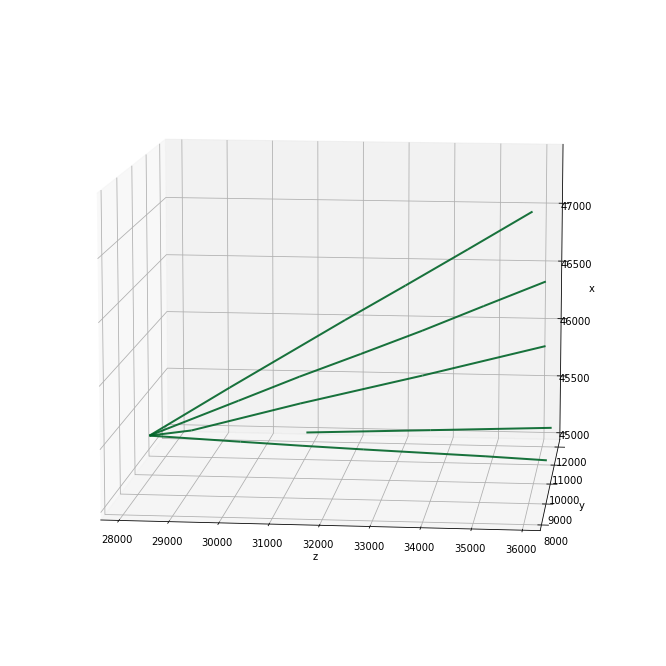

In [16]:
plot_dataframe_lines(Lines)